In [1]:
import keras
from keras import layers
# This is the size of our encoded representations
encoding_dim = 32 # 32 floats -> compression of factor 24.5, assuming the
# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)


In [2]:
#Let's also create a separate encoder model:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)


In [3]:
#As well as the decoder model:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
#Now let's train our autoencoder to reconstruct MNIST digits.
#z`First, we'll configure our model to use a per-pixel binary crossentropy
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
# Let's prepare our input data. We're using MNIST digits, and we're discard
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [6]:
#We will normalize all values between 0 and 1 and we will flatten the 28x28
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [7]:
#Now let's train our autoencoder for 50 epochs:
autoencoder.fit(x_train, x_train,
 epochs=50,
 batch_size=256,
 shuffle=True,
 validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 4s 12ms/step - loss: 0.2719 - val_loss: 0.1859
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1689 - val_loss: 0.1529
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1437 - val_loss: 0.1332
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1277 - val_loss: 0.1202
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1171 - val_loss: 0.1117
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1101 - val_loss: 0.1062
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1052 - val_loss: 0.1020
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1016 - val_loss: 0.0991
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0990 - val_loss: 0.0967
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0972 - val_loss: 0.0

In [8]:
# After 50 epochs, the autoencoder seems to reach a stable train/validation
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


313/313 [==============================] - 1s 1ms/step


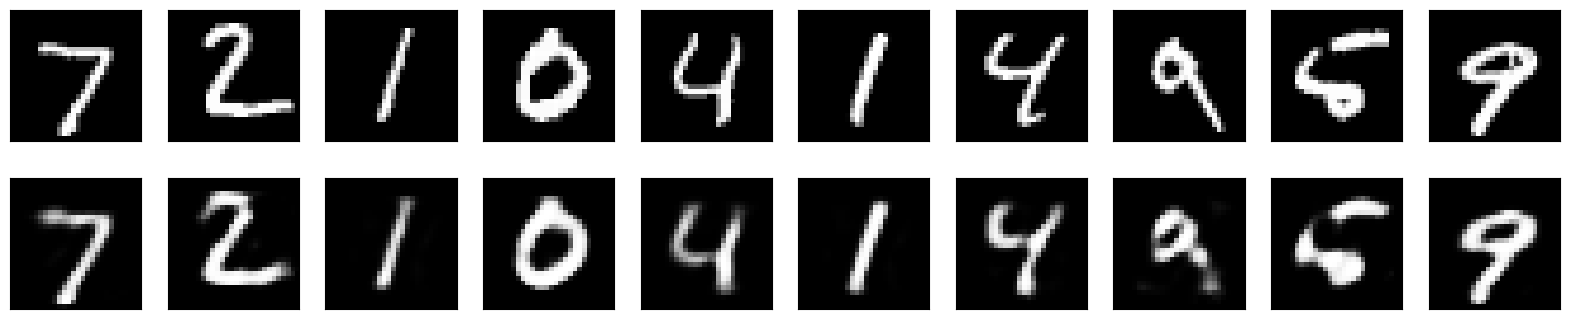

In [9]:
# Use Matplotlib
import matplotlib.pyplot as plt
n = 10 # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
 # Display original
 ax = plt.subplot(2, n, i + 1)
 plt.imshow(x_test[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 # Display reconstruction
 ax = plt.subplot(2, n, i + 1 + n)
 plt.imshow(decoded_imgs[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()